# Linear Regression

Dataset : Wine Quality Data Set (White Wine)
* source : https://archive.ics.uci.edu/ml/datasets/Wine+Quality
  * Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
* Number of Instances: red wine - 1599; white wine - 4898. 
*  Attribute information:
   * Input variables (based on physicochemical tests):
   * 1 - fixed acidity
   * 2 - volatile acidity
   * 3 - citric acid
   * 4 - residual sugar
   * 5 - chlorides
   * 6 - free sulfur dioxide
   * 7 - total sulfur dioxide
   * 8 - density
   * 9 - pH
   * 10 - sulphates
   * 11 - alcohol
   * Output variable (based on sensory data): 
   * 12 - quality (score between 0 and 10)
   
   
Each row represents a single wine, and each column represents some property of that wine. Here are some of the interesting columns:

* `density` -- shows the amount of material dissolved in the wine.
* `alcohol` -- the alcohol content of the wine.
* `quality` -- the average quality rating (1-10) given to the wine.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Drawing lines

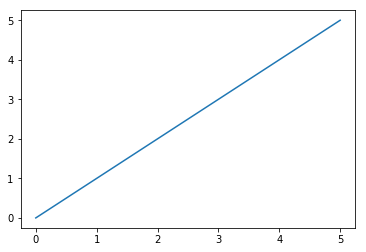

[1 2 3 4 5 6]


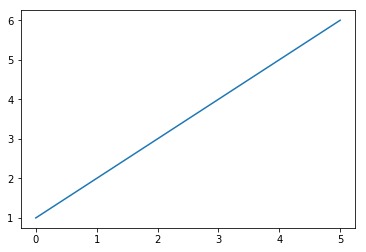

In [2]:
x = [0, 1, 2, 3, 4, 5]
# Going by our formula, every y value at a position is the same as the x-value in the same position.
# We could write y = x, but let's write them all out to make this more clear.
y = [0, 1, 2, 3, 4, 5]

# As you can see, this is a straight line that passes through the points (0,0), (1,1), (2,2), and so on.
plt.plot(x, y);plt.show()

# Let's try a slightly more ambitious line.
# What if we did y = x + 1?
# We'll make x an array now, so we can add 1 to every element more easily.
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x + 1

# y is the same as x, but every element has 1 added to it.
print(y)

# This plot passes through (0,1), (1,2), and so on.
# It's the same line as before, but shifted up 1 on the y-axis.
plt.plot(x, y); plt.show()

# By adding 1 to the line, we moved what's called the y-intercept -- where the line intersects with the y-axis.
# Moving the intercept can shift the whole line up (or down when we subtract).

### Working with slope

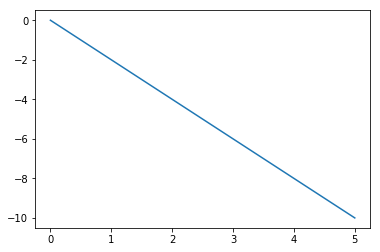

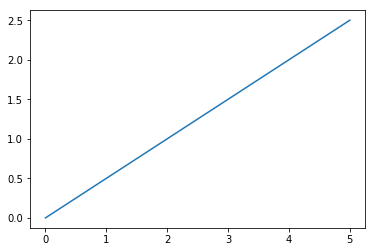

In [4]:
y = -2*x
plt.plot(x, y)
plt.show()

y = .5*x
plt.plot(x, y)
plt.show()

### Starting out with linear regression

The equation to create the formula takes the form $y=mx+b$.<br>

We have to calculate values for m and b before we can use our formula.<br>

We'll calculate slope first -- the formula is $\frac{cov(x,y)}{\sigma_{x}^{2}}$, which is just the covariance of x and y divided by the variance of x.<br>

We can use the `cov` function to calculate covariance, and the `.var()` method on Pandas series to calculate variance.

In [8]:
wine_quality = pd.read_csv('data/winequality-white.csv', sep=';')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
from numpy import cov

# Calculate the slope you would need to predict the "quality" column (y) 
# using the "density" column (x).

slope_density = (cov(wine_quality['density'],
                   wine_quality['quality'])\
                / wine_quality['density'].var())[0,1]
    
slope_density

-90.942399942137982

### Finishing linear regression

In [11]:
# Calculate the y-intercept that you would need to predict the "quality" column (y) 
# using the "density" column (x).

def calc_slope(x, y):
    return cov(x, y)[0, 1] / x.var()

def calc_intercept(x, y):
    
    return (y - calc_slope(x, y) * x).mean()


intercept_density = calc_intercept(wine_quality['density'],
                                  wine_quality['quality'])
intercept_density

96.277144576051555

### Making predictions

In [12]:
def calc_density_predictions(x):
    
    return slope_density*x + intercept_density
    
predicted_quality = wine_quality['density'].apply(calc_density_predictions)

### Finding error

Now that we know how to make a regression line manually, let's look at an easier way to do it, using a function from `scipy`.<br>

The linregress function makes it simple to do linear regression.<br>

Now that we know a simpler way to do linear regression, **let's look at how to figure out if our regression is good or bad**.<br>

We can plot out our line and our actual values, and see how far apart they are on the y-axis.<br>

We can also **compute the distance between each prediction and the actual value** -- these distances are called **residuals**.

* If we add up the sum of the squared residuals, we can get a good error estimate for our line.

We have to add the squared residuals, because just like differences from the mean, the residuals add to 0 if they aren't squared. To put it in math terms, **the sum of squared residuals** is:

$$\sum\limits_{i=1}^n{(y_{i} - \hat{y}_{i})^2}$$

The variable
$$\hat{y}_{i}$$
is the predicted y value at position i.

In [14]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope =\
        linregress(wine_quality['density'], wine_quality['quality'])
    
print(slope)
print(intercept)

-90.9423999421
96.2771445761


In [18]:
rss = ((wine_quality['quality']-(slope*wine_quality['density']+intercept))\
       **2).sum()
rss

3478.68946968817

### Standard error

From the sum of squared residuals, we can find the **standard error**. The standard error is similar to the standard deviation, but **it tries to make an estimate for the whole population of y-values -- even the ones we haven't seen yet that we may want to predict in the future**. <br>

The standard error lets us quickly determine how good or bad a linear model is at prediction. The equation for standard error is:

$$\sqrt{\frac{RSS}{n-2}}$$

You take the sum of squared residuals, divide by the number of y-points minus two, and then take the square root.

* You might be wondering about why 2 is subtracted -- this is due to differences between the whole population and a sample. This will be explained in more depth later on.

#### instructions
Calculate the standard error using the above formula.
* Calculate what proportion of actual y values are within 1 standard error of the predicted y value. Assign the result to within_one.
* Calculate what proportion of actual y values are within 2 standard errors of the predicted y value. Assign the result to within_two.
* Calculate what proportion of actual y values are within 3 standard errors of the predicted y value. Assign the result to within_three.
  * Assume that "within" means "up to and including", so be sure to count values that are exactly 1, 2, or 3 standard errors away.

In [19]:
stde = (rss/wine_quality.shape[0])**(1/2)

In [20]:
stde

0.8427493784277611

In [21]:
y = wine_quality['quality']
y_hat = slope*wine_quality['density']+intercept

In [37]:
within_one = len(y[abs((y-y_hat)/stde) <= 1])/len(y)
within_one

0.6845651286239282

In [38]:
within_two = len(y[abs((y-y_hat)/stde) <= 2])/len(y)
within_two

0.9356880359330338

In [39]:
within_three = len(y[abs((y-y_hat)/stde) <= 3])/len(y)
within_three

0.9936708860759493